In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
t = pd.read_csv('./data/Air_Traffic_Passenger_Statistics.csv')
t.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201812,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
1,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Enplaned,Low Fare,International,A,2791
2,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
3,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,11359
4,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645


In [46]:
from datetime import datetime
t['Activity Period'] = pd.to_datetime(t['Activity Period'], format='%Y%m')
# t['Activity Period'].apply(lambda x: x.strftime('%Y%m'))

In [47]:
passengers_count = t.groupby(['Activity Period']).agg(['sum'])[['Passenger Count']].reset_index()
passengers_count.head()

,Activity Period,Passenger Count
,,sum
0,2005-07-01,3225769
1,2005-08-01,3195866
2,2005-09-01,2740553
3,2005-10-01,2770715
4,2005-11-01,2617333


In [48]:
# passengers_count['Passenger Count']['sum']

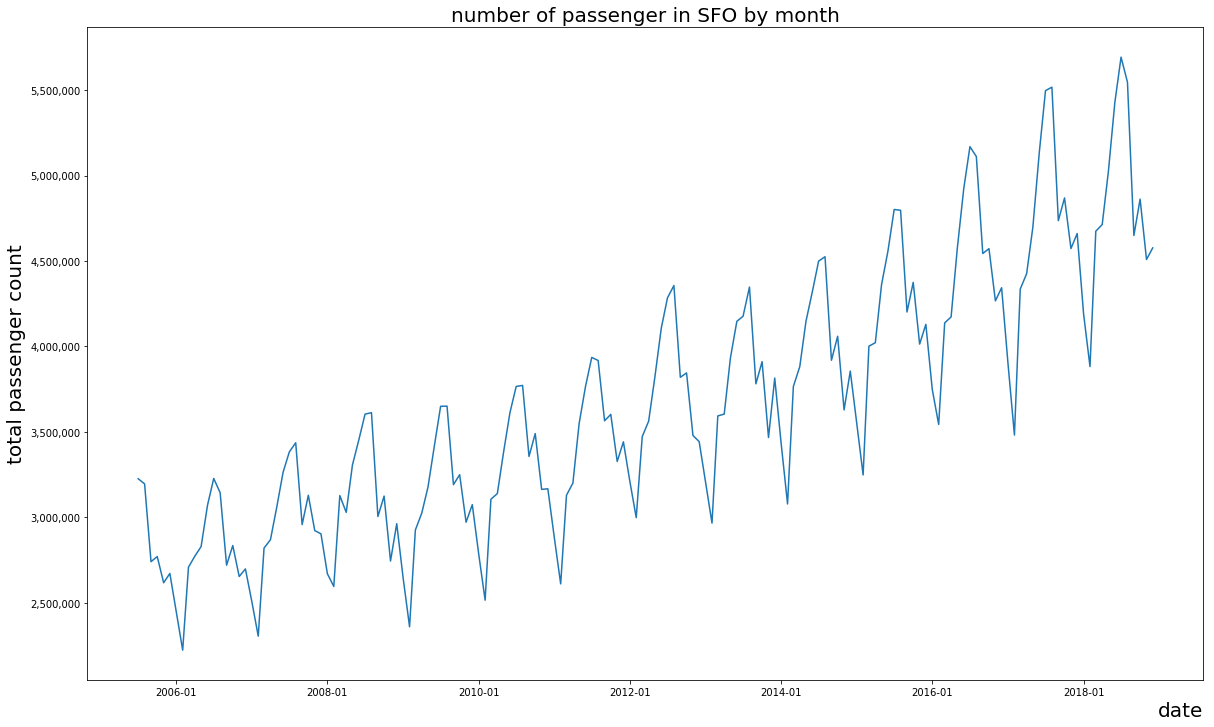

In [58]:
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
# https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels

# fig, ax = plt.figure(1, figsize=(20,12))
fig, ax = plt.subplots(figsize=(20,12))
plt.title('number of passenger in SFO by month', fontsize=20);
plt.xlabel("date", horizontalalignment='right', x=1.0, y = 10, fontsize=20);
plt.ylabel("total passenger count", fontsize=20);
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.plot(passengers_count['Activity Period'], passengers_count['Passenger Count']['sum'])
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()